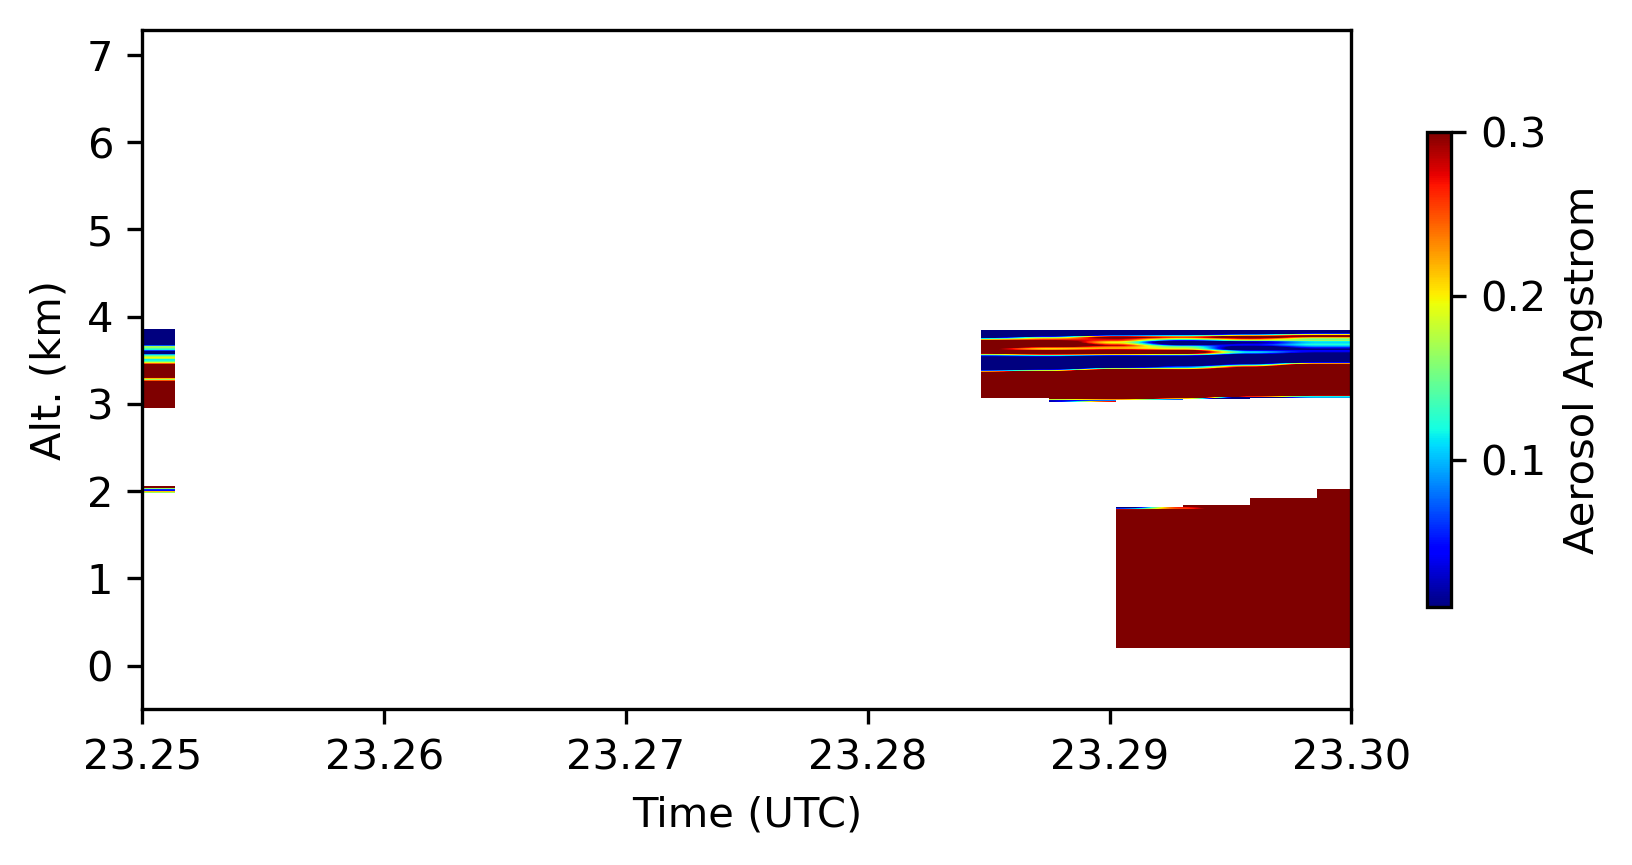

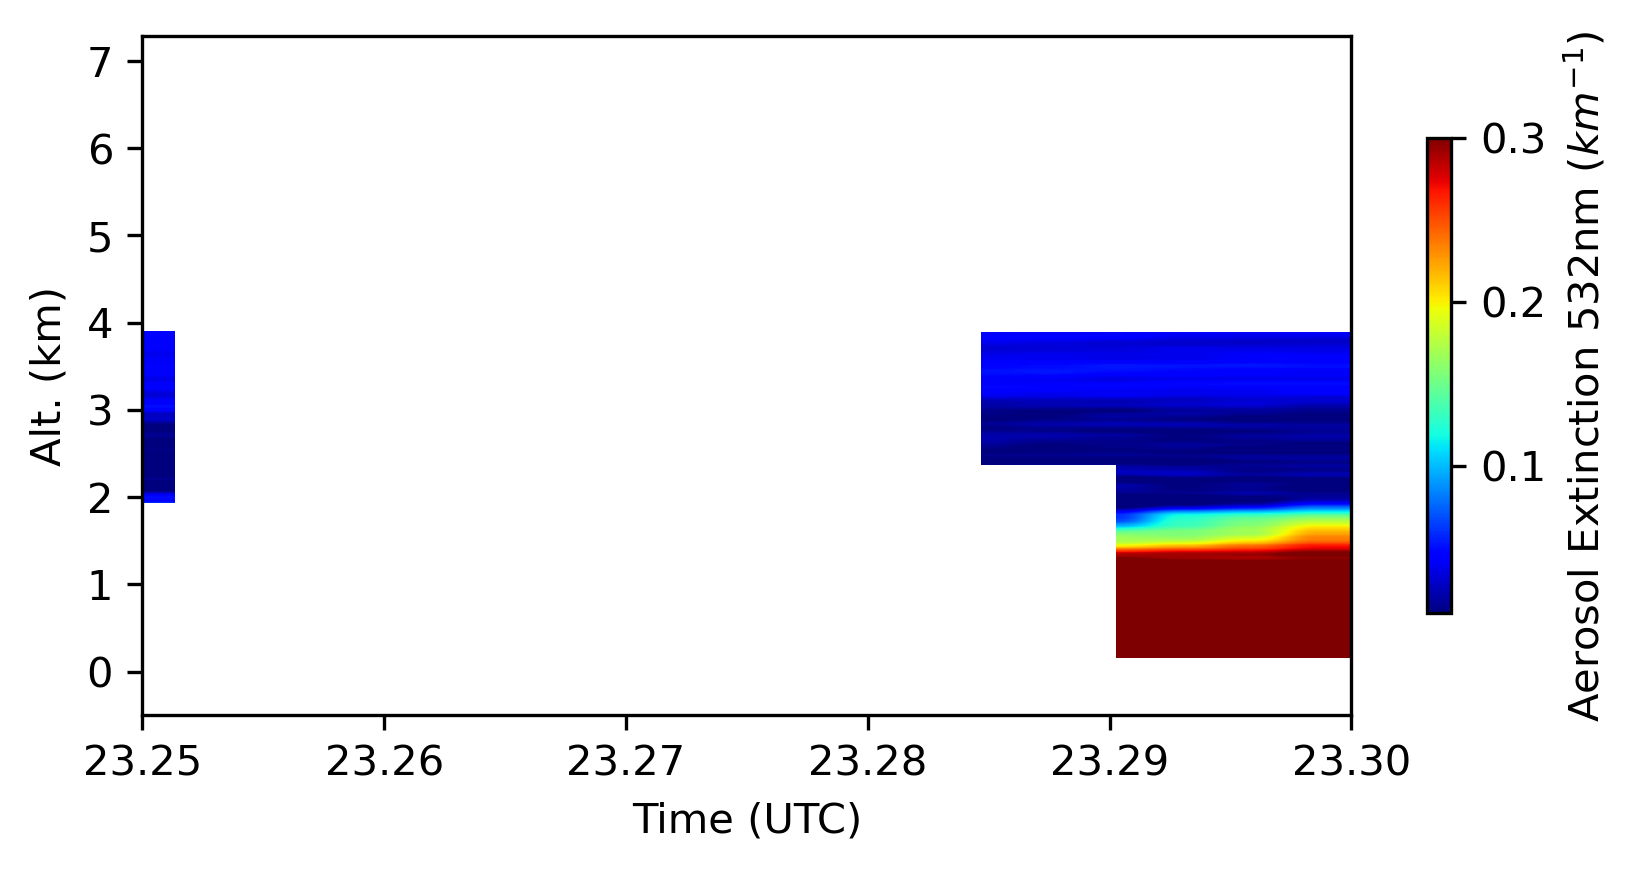

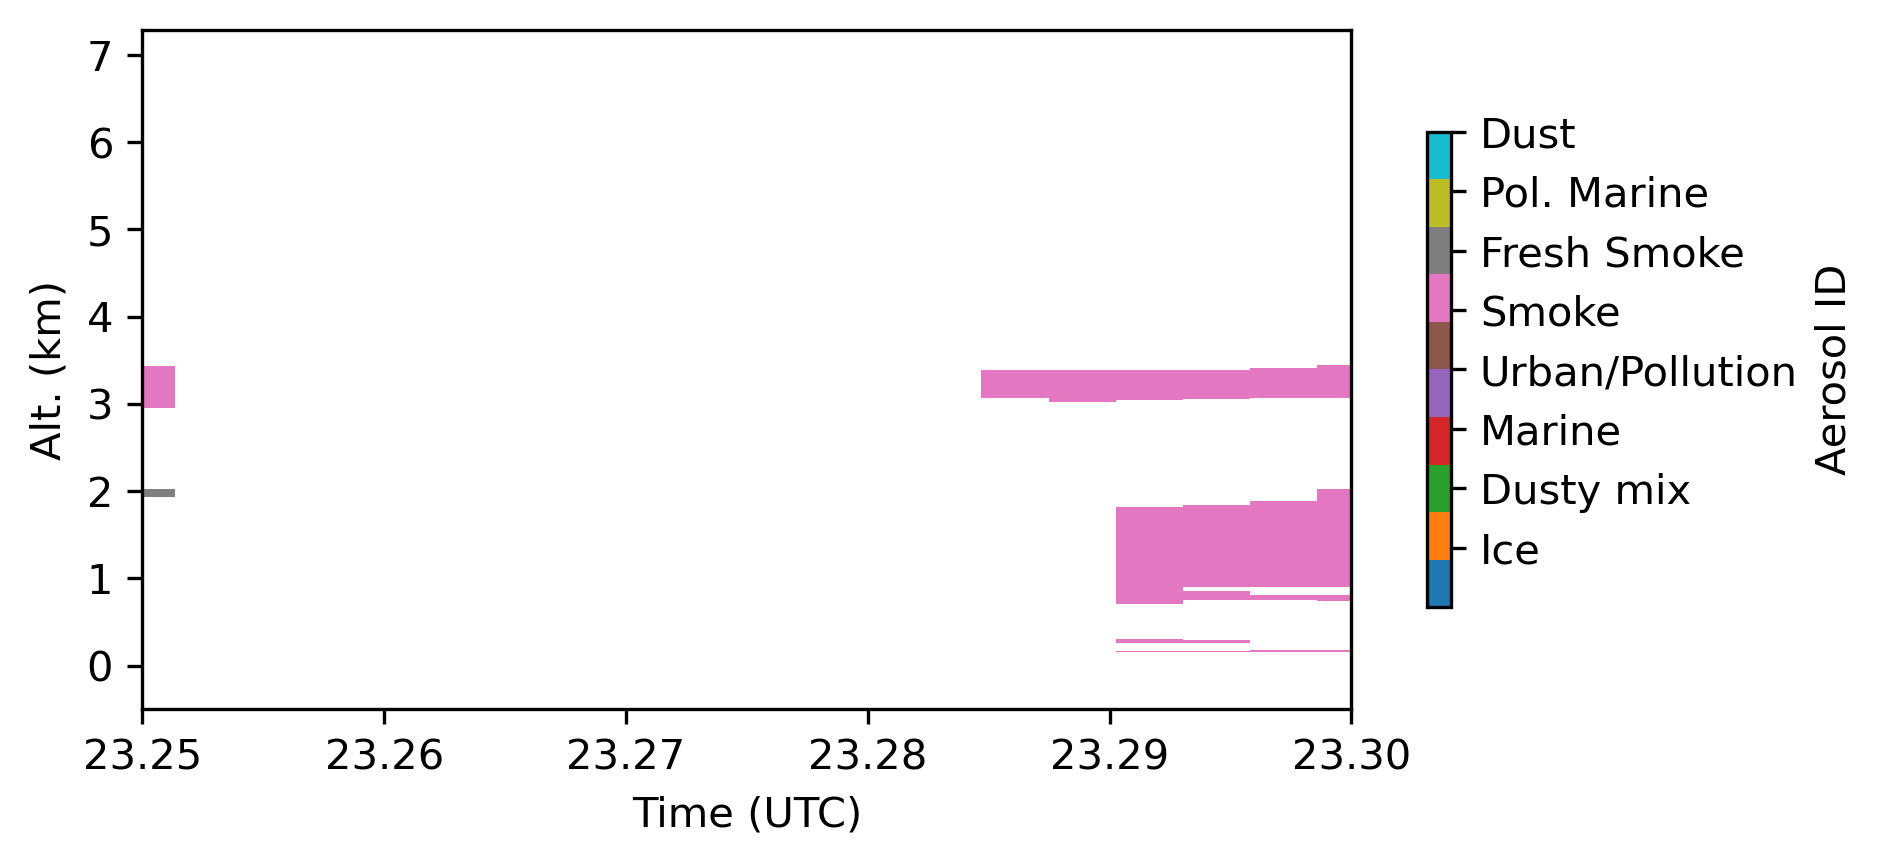

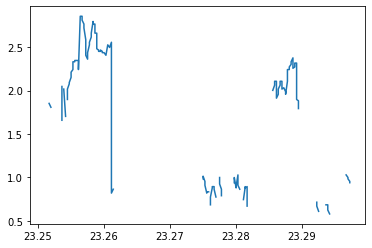

In [2]:
def read_text(fname):
    fo=open(fname,'r') #create file object
    #headstr=fo.readline()
    data=fo.readlines()
    #print (data)
    fo.close()  # close object
    return data

import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
import numpy as np
import math
import pandas as pd
from pyhdf.SD import SD, SDC
import h5py
import netCDF4 as nc


#timerange=[23.1,23.8]#for 0915
timerange=[23.25,23.3]
#timerange=[26.8,27.15]
#0904
#timerange=[27.5,28.2] #for 0921
yyyymmdd='20190915'
hsrl_fname='CAMP2EX-HSRL2_P3B_'+yyyymmdd+'_R0.h5'

fid = h5py.File(hsrl_fname,'r')
hsrl_time= fid['Nav_Data/gps_time']
hsrl_lon = fid['Nav_Data/gps_lon']
hsrl_lat = fid['Nav_Data/gps_lat']
hsrl_alt = fid['Nav_Data/gps_alt']
hsrl_sza = fid['Nav_Data/solar_zenith']
hsrl_ext = fid['DataProducts/532_ext']
hsrl_aeroID=fid['DataProducts/Aerosol_ID']
hsrl_tauhi=fid['DataProducts/532_AOT_hi']
hsrl_tauac=fid['DataProducts/532_AOT_above_cloud']
hsrl_vert=fid['DataProducts/Altitude']
hsrl_press=fid['State/Pressure']
hsrl_ozone=fid['State/O3']
hsrl_temp =fid['State/Temperature']
hsrl_rh   =fid['State/Relative_Humidity']
hsrl_sza  =fid['Nav_Data/solar_zenith']
hsrl_Ans  =fid['DataProducts/Angstrom_532_355']
hsrl_tauuv=fid['DataProducts/355_AOT_hi']
hsrl_aot_alts=fid['DataProducts/532_AOT_alts']

hsrl_time=hsrl_time[:]
hsrl_ext =hsrl_ext[:]
hsrl_aeroID=hsrl_aeroID[:]
hsrl_alt = hsrl_alt[:]/1000.0
hsrl_vert= hsrl_vert[:]/1000.0
hsrl_press=hsrl_press[:]
hsrl_ozone=hsrl_ozone[:]
hsrl_temp =hsrl_temp[:]
hsrl_rh = hsrl_rh[:]
hsrl_sza= hsrl_sza[:]
hsrl_Ans= hsrl_Ans[:]
hsrl_tauuv=hsrl_tauuv[:]
hsrl_aot_alts=hsrl_aot_alts[:]

ind=np.where((hsrl_time < 10.0))
ind=ind[0]
hsrl_time[ind]=hsrl_time[ind]+24
ind=np.where((hsrl_time > timerange[0]) & (hsrl_time < timerange[1]))
ind=ind[0]
hsrl_time1=hsrl_time[ind]
hsrl_lon1 =hsrl_lon[ind]
hsrl_lat1 =hsrl_lat[ind]
hsrl_ext1 =hsrl_ext[ind,:]
hsrl_aeroID1=hsrl_aeroID[ind,:]
hsrl_press1=hsrl_press[ind,:]
hsrl_ozone1=hsrl_ozone[ind,:]
hsrl_temp1 =hsrl_temp[ind,:]
hsrl_rh1 = hsrl_rh[ind,:]
hsrl_tauhi1=hsrl_tauhi[ind]
hsrl_sza1 = hsrl_sza[ind]
hsrl_alt1 = hsrl_alt[ind]
hsrl_Ans1 = hsrl_Ans[ind,:]
hsrl_tauuv1=hsrl_tauuv[ind]
hsrl_aot_alts1=hsrl_aot_alts[ind,:]/1000.0
#print(hsrl_aot_alts1.shape)
dimension=hsrl_ext1.shape
Nx=dimension[0]
Ny=dimension[1]
hsrl_vert.reshape(Ny)
hsrl_ext1.reshape((Nx,Ny))
hsrl_ext2=hsrl_ext1.T
hsrl_ext3=hsrl_ext2[::-1]

hsrl_Ans2=hsrl_Ans1.T
hsrl_Ans3=hsrl_Ans2[::-1]
fig, ax =plt.subplots(figsize=[6.5,3],dpi=300)
p01=ax.imshow(hsrl_Ans3,aspect='auto',vmin=0.01,vmax=0.3,extent=[timerange[0],timerange[1],-0.5,7.29],cmap='jet')
ax.set_ylabel('Alt. (km)')
ax.set_xlabel('Time (UTC)')
cb1=fig.colorbar(p01,ax=ax,orientation='vertical',shrink=0.7,pad=0.05)
cb1.set_label(label='Aerosol Angstrom')
plt.show()

fig, ax =plt.subplots(figsize=[6.5,3],dpi=300)
p01=ax.imshow(hsrl_ext3,aspect='auto',vmin=0.01,vmax=0.3,extent=[timerange[0],timerange[1],-0.5,7.29],cmap='jet')
ax.set_ylabel('Alt. (km)')
ax.set_xlabel('Time (UTC)')
cb1=fig.colorbar(p01,ax=ax,orientation='vertical',shrink=0.7,pad=0.05)
cb1.set_label(label='Aerosol Extinction 532nm ($km^{-1}$)')
plt.show()

fig, ax =plt.subplots(figsize=[6.5,3],dpi=300)
hsrl_aeroID2=hsrl_aeroID1.T
hsrl_aeroID3=hsrl_aeroID2[::-1]
p11=ax.imshow(hsrl_aeroID3,aspect='auto',vmin=0.,vmax=8,extent=[timerange[0],timerange[1],-0.5,7.29],cmap='tab10')
ax.set_ylabel('Alt. (km)')
ax.set_xlabel('Time (UTC)')
cb1=fig.colorbar(p11,ax=ax,orientation='vertical',shrink=0.7,pad=0.05,ticks=[1,2,3,4,5,6,7,8])
cb1.set_label(label='Aerosol ID')
cb1.ax.set_yticklabels(['Ice','Dusty mix','Marine','Urban/Pollution','Smoke','Fresh Smoke','Pol. Marine','Dust'])
plt.show()

#hsrl 2hz data
hsrl_2hz_fname='/data/keeling/a/yulanh/c/camp2ex/HSRL_CTH_2Hz/'+yyyymmdd+'_F1_special.h5'
fid=h5py.File(hsrl_2hz_fname,'r')
CTH_2hz=fid['DataProducts/cloud_top_height']
CTH_2hz=CTH_2hz[:]/1000.0
time_2hz=fid['Nav_Data/gps_time']
time_2hz=time_2hz[:]
ind=np.where(time_2hz < 10)
time_2hz[ind]=time_2hz[ind]+24
ind=np.where((time_2hz > timerange[0]) & (time_2hz < timerange[1]))
ind=ind[0]
CTH_2hz_1=CTH_2hz[ind]
time_2hz_1=time_2hz[ind]
plt.plot(time_2hz_1,CTH_2hz_1)



In [2]:
# read ERA5 data
fn = 'CAMP2Ex_201909160006_ERA5.nc'
ds = nc.Dataset(fn)
era_lat=ds['latitude'][:]
era_lon=ds['longitude'][:]
era_pres=ds['level'][:]
era_o3 =ds['o3'][:]
era_t  =ds['t'][:]
era_r  =ds['r'][:]
print(era_o3.shape)
print(era_lon.shape)
print(era_lat.shape)
print(era_pres)

/tmp/ipykernel_35162/295869778.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  era_lat=ds['latitude'][:]
/tmp/ipykernel_35162/295869778.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  era_lon=ds['longitude'][:]
/tmp/ipykernel_35162/295869778.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this wa

(7, 37, 101, 181)
(181,)
(101,)
[   1    2    3    5    7   10   20   30   50   70  100  125  150  175
  200  225  250  300  350  400  450  500  550  600  650  700  750  775
  800  825  850  875  900  925  950  975 1000]


/tmp/ipykernel_35162/295869778.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  era_r  =ds['r'][:]


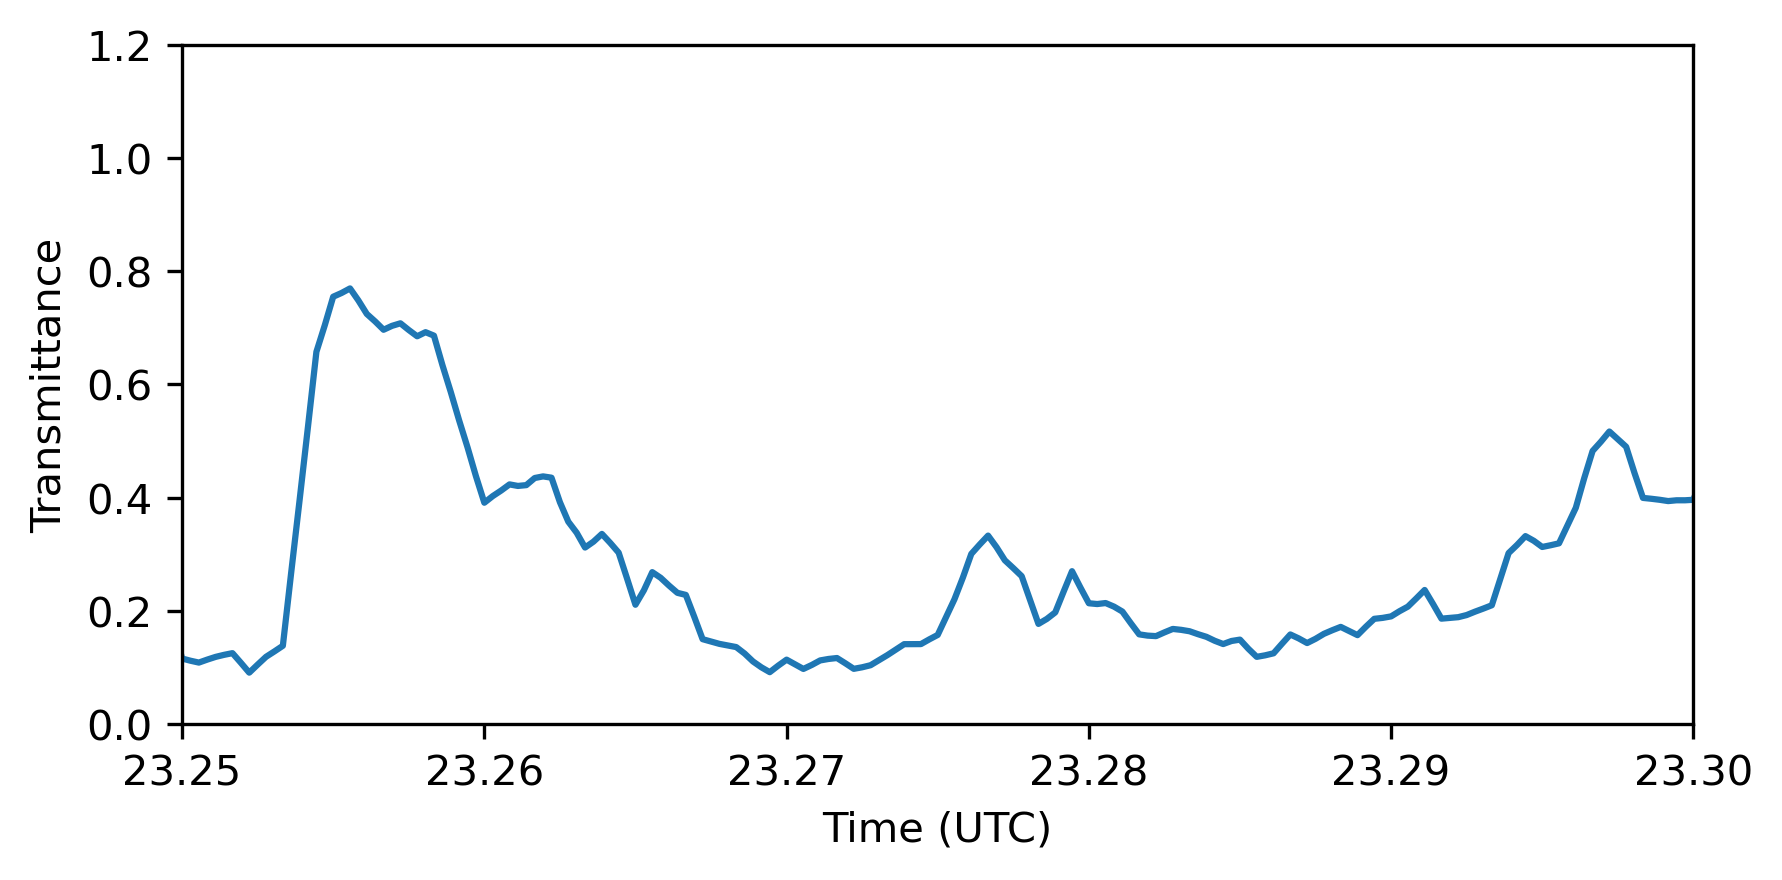

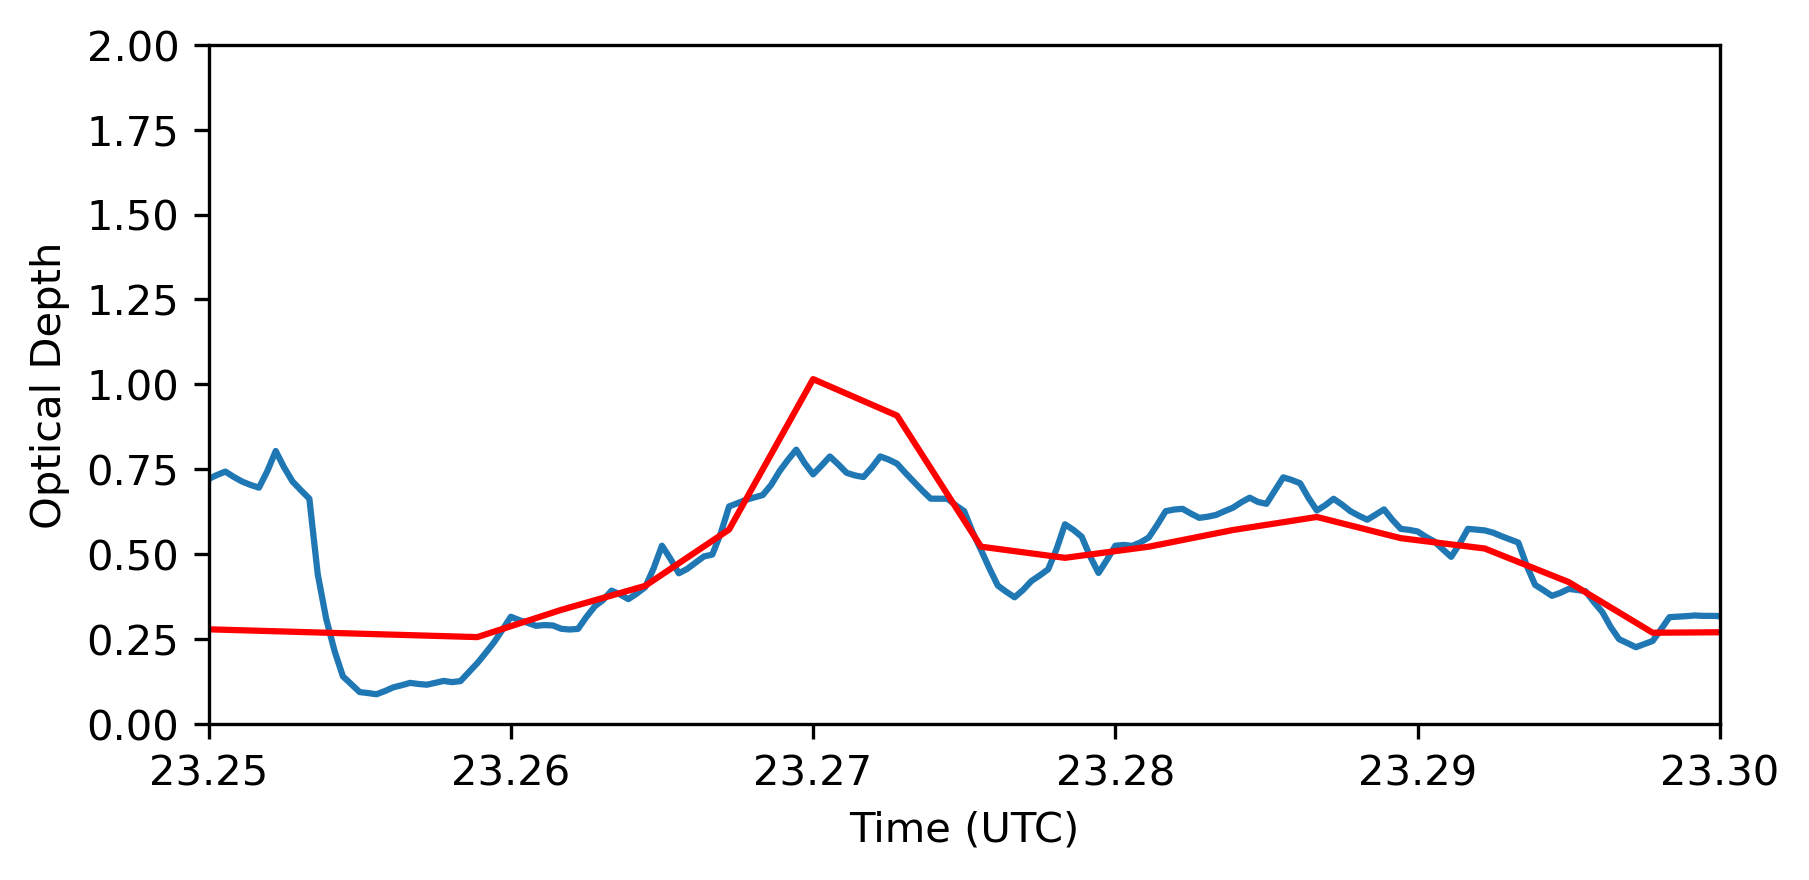

In [4]:
import glob
#=== plot transmittance ===
spn_tran='spn_transmittance_'+yyyymmdd+'_hiac.txt'
data=read_text(spn_tran)
splitcol=data[0].split(' ')
Ncol=len(splitcol)-splitcol.count('')
Nrow=len(data)
dataT=np.zeros((Nrow,Ncol),'f')
for i in range(Nrow):
    splitcol=data[i].split(' ')
    k=0
    for j in range(len(splitcol)):
        if splitcol[j] != '' and splitcol[j] != '\n' : 
            dataT[i,k]=float(splitcol[j])
            k=k+1
spn_time=dataT[:,0]
spn_tran=dataT[:,1]
ind=np.where(spn_time < 10)
spn_time[ind]=spn_time[ind]+24
fig, ax =plt.subplots(figsize=[6.5,3],dpi=300)
p02=ax.plot(spn_time,spn_tran)
ax.set_xlim(timerange)
ax.set_ylim((0.0,1.2))
ax.set_xlabel('Time (UTC)')
ax.set_ylabel('Transmittance')
plt.show()

#=== plot optical depth ===
spn_tau='spn_optical_depth_'+yyyymmdd+'_hiac.txt'
data=read_text(spn_tau)
splitcol=data[0].split(' ')
Ncol=len(splitcol)-splitcol.count('')
Nrow=len(data)
dataT=np.zeros((Nrow,Ncol),'f')
for i in range(Nrow):
    splitcol=data[i].split(' ')
    k=0
    for j in range(len(splitcol)):
        if splitcol[j] != '' and splitcol[j] != '\n' : 
            dataT[i,k]=float(splitcol[j])
            k=k+1
#spn_time=dataT[:,0]
spn_tau=dataT[:,1]

fig, ax =plt.subplots(figsize=[6.5,3],dpi=300)
p02=ax.plot(spn_time,spn_tau)
ax.set_xlim(timerange)
ax.set_ylim((0.,2))
ax.set_xlabel('Time (UTC)')
ax.set_ylabel('Optical Depth')


# read matt cod
matt_fname=glob.glob('/data/keeling/a/yulanh/c/BW_backup/mydata/HSRL_out/CAMP2Ex/SPN_cirrus/SPN_COD_Matt/'+\
                     yyyymmdd+'*')
matt_fname=matt_fname[0]
fid = h5py.File(matt_fname,'r')
SPNmatt_time= fid['UTC'] 
matt_tau= fid['COD_870nm']
p03=ax.plot(SPNmatt_time,matt_tau,'r')
plt.show()

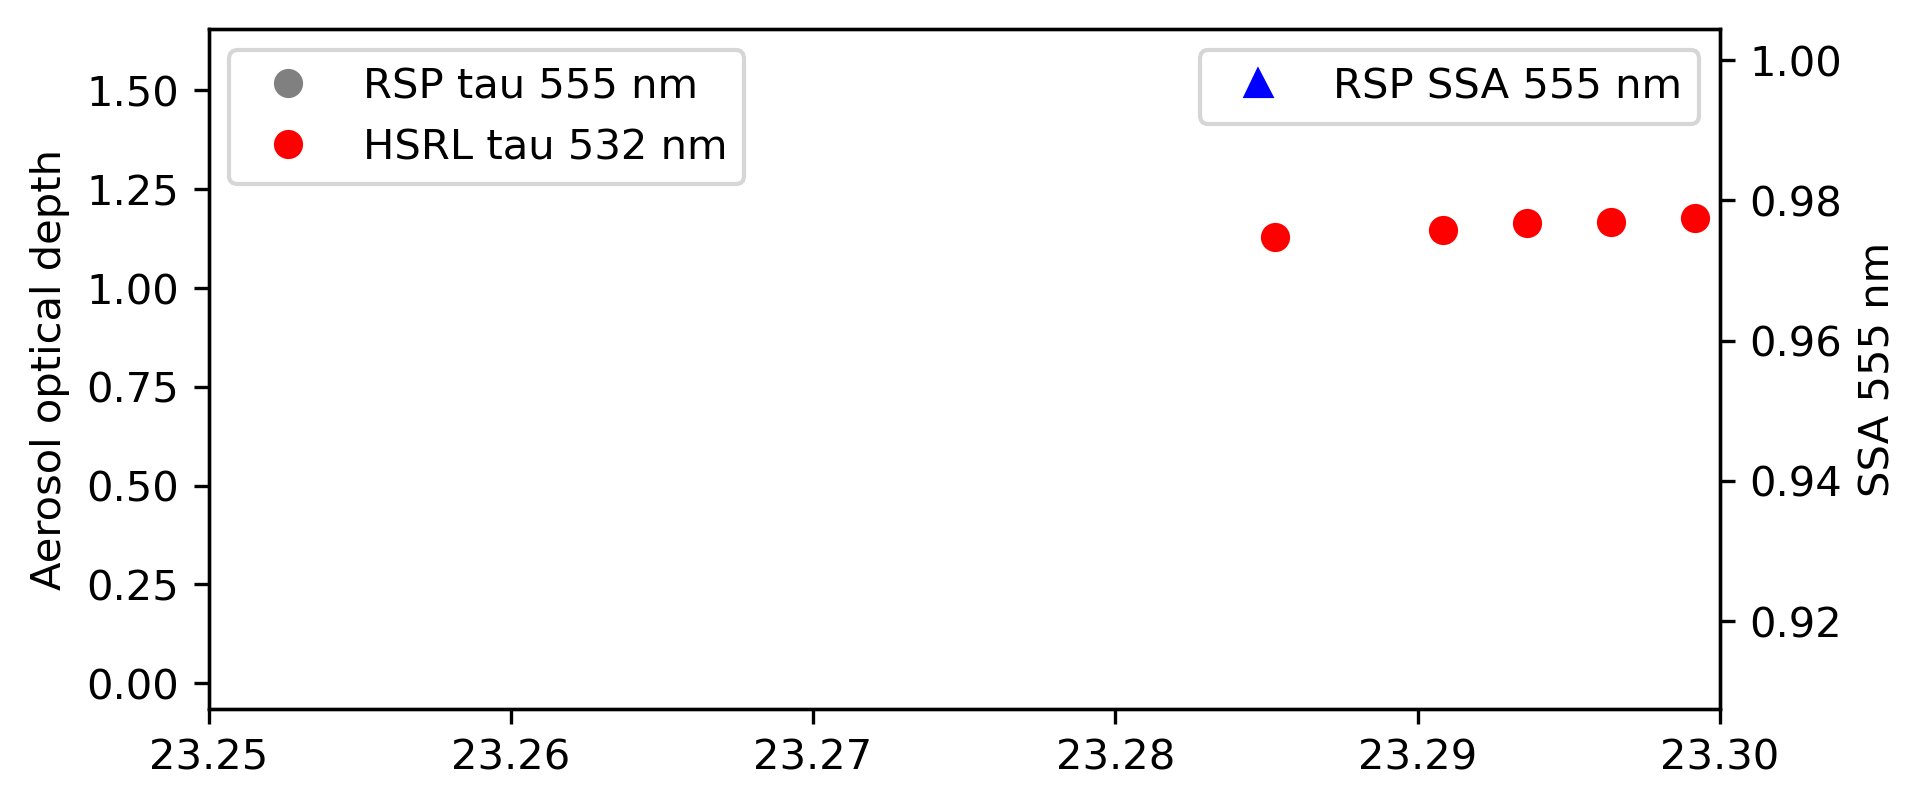

nan


/data/keeling/a/yulanh/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data/keeling/a/yulanh/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [5]:

#== plot optical depth ====
rsp_fname='CAMP2EX-RSP1-AER_P3B_'+yyyymmdd+'_R2.h5'
fid = h5py.File(rsp_fname,'r')
rsp_tau=fid['aerosol_tau_total_555']
rsp_ssa=fid['aerosol_ssa_total_555']
rsp_time=fid['rsp_time']
rsp_time=rsp_time[:]
rsp_tau =rsp_tau[:]
rsp_ssa =rsp_ssa[:]
ind=np.where(rsp_time < 10)
rsp_time[ind]=rsp_time[ind]+24
fig, ax =plt.subplots(figsize=[6.5,3],dpi=300)
p04=ax.plot(rsp_time,rsp_tau,color='grey',linestyle=' ',marker='o')
p14=ax.plot(hsrl_time,hsrl_tauhi,color='red',linestyle='',marker='o')
#p24=ax.plot(hsrl_time,hsrl_tauac,color='blue',linestyle='',marker='o')
ax.set_xlim(timerange)
ax.set_ylabel('Aerosol optical depth')
ax1=ax.twinx() # instantiate a second axes that shares the same x-axis 
ax1.plot(rsp_time,rsp_ssa,linestyle='',color='blue',marker='^')
ax1.set_ylabel('SSA 555 nm')
ax.legend(['RSP tau 555 nm','HSRL tau 532 nm'],loc=2)
ax1.legend(['RSP SSA 555 nm'],loc=1)
plt.show()
ind=np.where((rsp_time > timerange[0]) & (rsp_time < timerange[1]))
tprsp=rsp_ssa[ind]
print(np.mean(tprsp))
#p13=ax.plot(BBR_time,BBR_upsw,color='grey',linestyle='dashed')


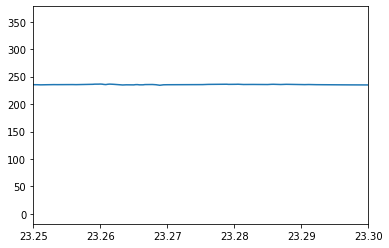

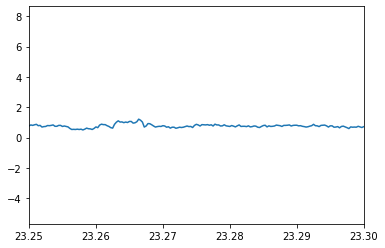

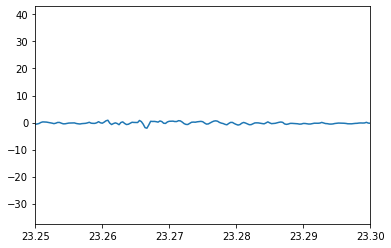

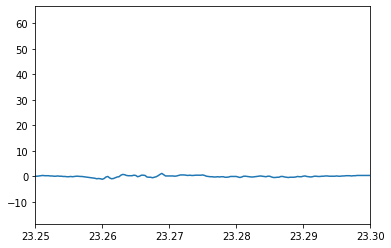

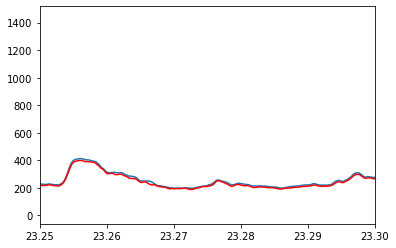

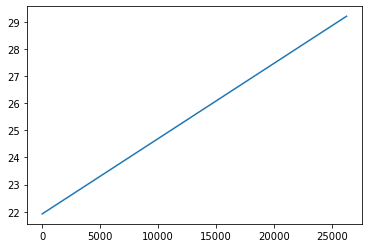

In [22]:
#== read plane attitude ====
metdir='/data/keeling/a/yulanh/c/BW_backup/mydata/HSRL_out/CAMP2Ex/Metnav/'
met_file=metdir+'CAMP2EX-MetNav_P3B_'+yyyymmdd+'_R0.ict'
df=pd.read_csv(met_file,delimiter=',',header=73)
met_time=df['Time_Start']/3600.0
met_hgt =df['GPS_Altitude']/1000.0
met_sza =df['Solar_Zenith_Angle']
met_roll=df['Roll_Angle']
met_pitch=df['Pitch_Angle']
met_sam =df['Sun_Azimuth']
met_lat =df['Latitude']
met_lon =df['Longitude']
met_head=df['True_Heading']
met_drift=df['Drift_Angle']

tind=np.where(met_time < 10)[0]
met_time[tind]=met_time[tind]+24.0

a1=np.cos((90-met_sza)*math.pi/180.0)*np.sin(met_roll*math.pi/180.0)*np.sin((met_sam - met_head)*math.pi/180.0)
a2=np.cos((90-met_sza)*math.pi/180.0)*np.sin(met_pitch*math.pi/180.0)*np.cos((met_sam - met_head)*math.pi/180.0)
a3=np.sin((90-met_sza)*math.pi/180.0)*np.cos(met_pitch*math.pi/180.0)*np.cos(met_roll*math.pi/180.0)

correct_factor=np.sin((90-met_sza)*math.pi/180.0)/(a1-a2+a3)
ind=np.where((correct_factor > 50) | (correct_factor < 0.0))[0]
correct_factor[ind]=1.0

plt.plot(met_time,met_head)
plt.xlim(timerange)
plt.show()
plt.plot(met_time,met_pitch)
plt.xlim(timerange)
plt.show()
plt.plot(met_time,met_roll)
plt.xlim(timerange)
plt.show()
plt.plot(met_time,met_drift)
plt.xlim(timerange)
plt.show()
## plot BBR data
BBR_fname='CAMP2EX-BBR_P3B_'+yyyymmdd+'_R2.ict'
fo=open(BBR_fname,'r') #create file object
data=fo.readlines()[54:]
fo.close()
splitcol=data[0].split(',')
Ncol=len(splitcol)-splitcol.count('')
Nrow=len(data)
dataT=np.zeros((Nrow,Ncol),'f')
for i in range(Nrow):
    splitcol=data[i].split(',')
    k=0
    for j in range(len(splitcol)):
        if splitcol[j] != '' and splitcol[j] != '\n' : 
            dataT[i,k]=float(splitcol[j])
            k=k+1
            

BBR_time=dataT[:,0]/3600.0
#BBR_dnlw=dataT[:,1]
#BBR_uplw=dataT[:,2]
BBR_dnsw=dataT[:,3]
BBR_upsw=dataT[:,4]
ind=np.where(BBR_time < 10)
BBR_time[ind]=BBR_time[ind]+24
ind=np.where(BBR_dnsw < 0.0)[0]
BBR_dnsw[ind]='nan'
ind=np.where(BBR_upsw < 0.0)[0]
BBR_upsw[ind]='nan'

BBR_dnsw_ad=BBR_dnsw*correct_factor_new
BBR_upsw_ad=BBR_upsw*correct_factor_new

correct_factor_new=np.interp(BBR_time,met_time,correct_factor)
plt.plot(BBR_time,BBR_dnsw)
plt.plot(BBR_time,BBR_dnsw*correct_factor_new,'r')
plt.xlim(timerange)
plt.show()

plt.plot(BBR_time)


In [8]:
# read SSFR and get albedo
wv_len=[415,440,500,550,675,870,990,1020,1064,1250,1650,2100]
SSFR_dir='/data/gdi/f/yulanh/Simulate_camp2ex/SSFR/'
SSFR_fname=SSFR_dir+'CAMP2EX-SSFR-Partial_P3B_'+yyyymmdd+'_R0.ict'
print(SSFR_fname)
df1=pd.read_csv(SSFR_fname,delimiter=',',header=70)
data=df1.to_numpy()

SSFR_time=data[:,0]/3600.0
print(SSFR_time[0])
ind=np.where(SSFR_time < 10.0)[0]
SSFR_time[ind]=SSFR_time[ind]+24


dn_wv=np.zeros((len(SSFR_time),len(wv_len)),'f')
up_wv=np.zeros((len(SSFR_time),len(wv_len)),'f')

#dn_wv[:,0]=df['DN440']
dn_wv[:,0]=data[:,1] #415
dn_wv[:,1]=data[:,2] #440
dn_wv[:,2]=data[:,3] #500
dn_wv[:,3]=data[:,4] #550
dn_wv[:,4]=data[:,5] #675
dn_wv[:,5]=data[:,6] #870
dn_wv[:,6]=data[:,7] #990
dn_wv[:,7]=data[:,8] #1020
dn_wv[:,8]=data[:,9] #1064
dn_wv[:,9]=data[:,10] #1250
dn_wv[:,10]=data[:,11]#1650 
dn_wv[:,11]=data[:,12]#2100

up_wv[:,0]=data[:,13] #415
up_wv[:,1]=data[:,14] #440
up_wv[:,2]=data[:,15] #500
up_wv[:,3]=data[:,16] #550
up_wv[:,4]=data[:,17] #675
up_wv[:,5]=data[:,18] #870
up_wv[:,6]=data[:,19] #990
up_wv[:,7]=data[:,20] #1020
up_wv[:,8]=data[:,21] #1064
up_wv[:,9]=data[:,22] #1250
up_wv[:,10]=data[:,23] #1650
up_wv[:,11]=data[:,24] #2100

ssfr_lon=data[:,25]
ssfr_lat=data[:,26]

dn_wv[dn_wv == -999.0]='nan'

up_wv[dn_wv == -999.0]='nan'

# SSFR whole spectral
SSFR_fname1=SSFR_dir+'CAMP2EX-SSFR_P3B_'+yyyymmdd+'_RA.h5'
fid = h5py.File(SSFR_fname1,'r')
ssfr_nadflux=fid['nad_flux']
ssfr_nadwvl =fid['nad_wvl']
ssfr_zenflux=fid['zen_flux']
ssfr_zenwvl =fid['zen_wvl']
ssfr_time1  =fid['tmhr']


/data/gdi/f/yulanh/Simulate_camp2ex/SSFR/CAMP2EX-SSFR-Partial_P3B_20190915_R0.ict
21.91861111111111
(28162,) (38412, 424)


In [ ]:
def write_swinput(SZA,ci_tau,ssa,gg,flight_alt):
    swoutfile='sw_ic_outfile1'
    swfname=open('swinput1','w')
    swfname.write('atmosphere_file /data/keeling/a/yulanh/c/software_install/libradtran/2.0.2/share/libRadtran/data/atmmod/afglt.dat \n')
    swfname.write('source solar /data/keeling/a/yulanh/c/software_install/libradtran/2.0.2/share/libRadtran/data/solar_flux/kurudz_1.0nm.dat \n')
    swfname.write('wavelength 250 3600\n')
    swfname.write('mol_abs_param reptran coarse\n')
    swfname.write('radiosonde atm_file_era.dat H2O RH O3 MMR\n')
    swfname.write('rte_solver disort\n')
       # swfname.write('sur_temperature '+str(surf_temp)+'\n')
    swfname.write('sza '+str(SZA[0])+'\n')
        
    if (tpspn_mean > 0):   
        swfname.write('ic_properties yang2013 interpolate \n')
        swfname.write('ic_habit_yang2013 column_8elements smooth \n')
        swfname.write('ic_file 1D ICE_1H.dat\n')
        swfname.write('ic_modify tau set '+str(float(ci_tau))+'\n')
            
        swfname.write('aerosol_default\n')
        #swfname.write('aerosol_species_library OPAC\n')
        #swfname.write('aerosol_species_file soot\n')
       # swfname.write('aerosol_angstrom '+str(alpha)+'  '+str(beta)+'\n')
        swfname.write('aerosol_file tau aero_file_full.dat\n')
        swfname.write('aerosol_modify ssa set '+str(ssa)+'\n')
        swfname.write('aerosol_modify gg set '+str(gg)+'\n')
        #swfname.write('aerosol_file moments /data/keeling/a/yulanh/c/software_install/libradtran/2.0.2/share/libRadtran/examples/AERO_MOMENTS.DAT\n')
        #swfname.write('disort_intcor moments')
        #swfname.write('aerosol_species_file /data/keeling/a/yulanh/c/MAIA/soot_finemode_0.5.dat soot\n')
        #swfname.write('albedo_library IGBP\n')
        #swfname.write('brdf_rpv_type 17\n')
        swfname.write('albedo_file   albedo_file.dat \n')
        swfname.write('day_of_year 260 \n') #265 for 9.21, 260 for 9.16
        #swfname.write('zout 0 0.5 1 1.5 2 2.5 3 3.5 4 4.5 5 5.5 6 6.5 7 7.5 8 8.5 9 9.5 10 10.5 11 11.5 12 12.5 13 13.5 14 14.5 15 15.5 16 16.5 17 17.5 18 18.5 19 19.5 20\n')
        swfname.write('zout '+str(float(flight_alt))+'\n')
        swfname.write('output_user zout sza albedo eglo eup\n')
        swfname.write('output_process integrate\n')
        swfname.write('output_file  '+ swoutfile+'\n')
        swfname.write('quiet\n')
        swfname.close()
        os.system('uvspec <swinput1> test')
        

import os 
# apply for simulation
# data needed HSRL:hsrl_ext1, hsrl_aeroID1, hsrl_vert,hsrl_time1,CTH_2hz_1,time_2hz_1, hsrl_press1,hsrl_ozone1,hsrl_rh1,hsrl_temp1
# BBR_uplw,BBR_dnlw,BBR_upsw,BBR_dnsw,BBR_time
# RSP_time,RSP_ssa
# SPN tau

print('start',datetime.now())
Ns=len(hsrl_time1)
hsrl_vert=np.squeeze(hsrl_vert)
hsrl_time1=np.squeeze(hsrl_time1)
Nh=hsrl_vert.shape
Nh=Nh[0]
Nh_p=len(era_pres)
print(Ns,Nh,Nh_p,hsrl_vert.shape)
#one standard atmosphere

hsrl_ext1[np.isnan(hsrl_ext1)]=0.0
ind=np.where(abs(hsrl_vert)==abs(hsrl_vert).min())
ind=ind[0]
surf_bin_scp=ind
#==== obtain the mean ssa 
ind=np.where((rsp_time > timerange[0]) & (rsp_time < timerange[1]))[0]
ssa=0.0
if (len(ind) > 0):
    tprsp=rsp_ssa[ind]
    ssa=np.nanmean(tprsp)
    
if (ssa == 0.0):
    ssa=0.95
    
gg=0.55 # from 

input_albedo=np.zeros((Ns),'f')
swup_output=np.zeros((Ns),'f')
swdn_output=np.zeros((Ns),'f')
#lwup_output=np.zeros((Ns),'f')
#lwdn_output=np.zeros((Ns),'f')

swlw_outflight_level=open('swlw_outflight_level_'+yyyymmdd+'test.txt','w')

for si in np.arange(Ns):  
    # write input files
    # aerosol tau file, atmosphere file(pressure, temperature, water vapor, ozone)
    #print(hsrl_tauhi1[si],np.nansum(hsrl_ext1[si,:]*0.015))
    # exclude the situation when high resolution hsrl CTH has valid values
    tphsrl_time=hsrl_time1[si]
    tphsrl_lat =hsrl_lat1[si]
    tphsrl_lon =hsrl_lon1[si]
    #===== obtain reanalysis grid ====
    time_scp= 0
    lonind=(tphsrl_lon-era_lon[0])/0.25
    lonscp=round(lonind[0])
    latind=(era_lat[0]-tphsrl_lat)/0.25
    latscp=round(latind[0])
    tpera_temp=era_t[time_scp,:,latscp,lonscp]
    tpera_ozone=era_o3[time_scp,:,latscp,lonscp]
    tpera_rh =era_r[time_scp,:,latscp,lonscp]
    
    #print(tphsrl_lon,lonind,era_lon[lonscp],tphsrl_lat,latind,era_lat[latscp])
    
    ind=np.where((time_2hz_1 > (tphsrl_time - 0.00138)) & (time_2hz_1 < (tphsrl_time + 0.00139)))
    ind=ind[0]
    #print(tphsrl_time,time_2hz_1[ind])
    #print(np.nanmean(CTH_2hz_1[ind]),'mean',CTH_2hz_1[ind])
    ind1=np.where(CTH_2hz_1[ind] >0)
    ind1=ind1[0]
    CTH_num=len(ind1)
    #surf_temp=float(hsrl_temp1[si,0])

    if (hsrl_tauhi1[si] > 0): # & (CTH_num < 3)): CTH_num is used to control whether there are low clouds   
        print('write files')
        atm_fname=open('atm_file_era.dat','w')
        aero_fname=open('aero_file_full.dat','w')
        albedo_fname=open('albedo_file.dat','w')
        #down scale the resolution of aerosol, from surface to 6 km
        for hi in np.arange(14):
            hgt_top = 6.5-hi*0.5
            hgt_base= hgt_top-0.5
            ind=np.where((hsrl_vert > hgt_base) & (hsrl_vert <= hgt_top))
            ind=ind[0]
            tpmean_hgt=np.nanmean(hsrl_vert[ind])
            tpmean_aero_tau=np.nansum(hsrl_ext1[si,ind]*0.0149)
            #print(si,tpmean_hgt,tpmean_aero_tau)
            #print(hsrl_aot_alts1[si,0],hsrl_aot_alts1[si,1],hgt_top,hgt_base)
            if ((hgt_base > hsrl_aot_alts1[si,0]) & (hgt_top < hsrl_aot_alts1[si,1])):
                aero_fname.write('{} {}\n'.format(tpmean_hgt,tpmean_aero_tau))
            #    print('write')
            #print(hsrl_vert[Nh-hi-1,],hsrl_aot_alts1[si,0],hsrl_aot_alts1[si,1])
            #if ((hsrl_vert[Nh-hi-1] > hsrl_aot_alts1[si,0]) & (hsrl_vert[Nh-hi-1] < hsrl_aot_alts1[si,1])):
            #    aero_fname.write('{} {}\n'.format(hsrl_vert[Nh-hi-1],hsrl_ext1[si,Nh-hi-1]*0.0149))
                #print('write')
        for hi in np.arange(Nh_p):
            #if (hsrl_rh1[si,Nh-hi-1] > 0.0):
            #    atm_fname.write('{} {} {} {}\n'.format((hsrl_press1[si,Nh-hi-1]*std_atm),hsrl_temp1[si,Nh-hi-1],\
            #                hsrl_rh1[si,Nh-hi-1],hsrl_ozone1[si,Nh-hi-1])) #str(hsrl_press1[si,hi]*std_atm)+' '+str(hsrl_temp1[si,hi])+' '+\
            atm_fname.write('{} {} {} {} \n'.format(era_pres[hi],tpera_temp[hi],\
                            tpera_rh[hi],tpera_ozone[hi]))
         
        # write albedo file
        ind=np.where((SSFR_time > (tphsrl_time - 0.00138)) & (SSFR_time < (tphsrl_time + 0.00139)))[0]
        tpffsr_dnflx=np.nanmean(dn_wv[ind,:],axis=0)
        tpffsr_upflx=np.nanmean(up_wv[ind,:],axis=0)
        albedo_fname.write('{} {} \n'.format(250.0, 0.0))
        for wi in np.arange(len(wv_len)):
            albedo_fname.write('{} {} \n'.format(wv_len[wi],tpffsr_upflx[wi]/tpffsr_dnflx[wi]))
            
        albedo_fname.write('{} {} \n'.format(4000.0, 0.0))
        #surface_albedo=tpssfr_upflx/tpssfr_dnflx
        #print(CTH_num)
        #plt.plot(wv_len,tpffsr_upflx)
        #plt.show()
        #for wi in np.arange(len(wv_len)):
            
        atm_fname.close
        aero_fname.close
        albedo_fname.close
    #==== finish writing atmosphere and aerosol profile
    #== surface temperature 
        #surf_temp=float(hsrl_temp1[si,surf_bin_scp])
        #print(surf_temp,hsrl_temp1)
    #=== solar zenith angle ====
    #=== SPN tau ====
        #print(spn_time.shape,hsrl_time1.shape)
        ind=np.where((SPNmatt_time > (hsrl_time1[si]-0.0014)) & (SPNmatt_time < (hsrl_time1[si]+0.0014)))
        ind=ind[0]
        tpspn_mean=np.nanmean(matt_tau[ind])
        
        loop_times=1
        error_simu=20
        while (error_simu > 10):
            write_swinput(hsrl_sza1[si], tpspn_mean,ssa,gg,hsrl_alt1[si])
    
        #=== record outputs ===== 
            outfname=swoutfile
            data=read_text(outfname)
            splitcol=data[0].split(' ')
            Ncol=len(splitcol)-splitcol.count('')
            Nrow=len(data)
            swic_dataT=np.zeros((Nrow,Ncol),'f')
            for i in range(Nrow):
                splitcol=data[i].split(' ')
                k=0
            #print(splitcol)
                for j in range(len(splitcol)):
                    if len(splitcol[j]) != 0 and splitcol[j] !='\n':
                        swic_dataT[i,k]=float(splitcol[j])
                        k=k+1
            swic_dataT=np.squeeze(swic_dataT)
            input_albedo=swic_dataT[2]
            swup_output[si]=swic_dataT[4]/1000.0
            swdn_output[si]=swic_dataT[3]/1000.0
            #==== compare to BBR abservation =====
            ind=np.where((BBR_time > (hsrl_time1[si]-0.0014)) & (BBR_time < (hsrl_time1[si]+0.0014)))[0]
            tpmean_bbrupsw=np.nanmean(BBR_upsw[ind])
            tpmean_bbrdnsw=np.nanmean(BBR_dnsw[ind])
        #print(ind.shape,BBR_time.shape,hsrl_time1[si],BBR_time[0:10])
            error_simu=100*abs(swdn_output[si]-tpmean_bbrdnsw)/tpmean_bbrdnsw
            delta_tau=(swdn_output[si]-tpmean_bbrdnsw)*np.cos(float(hsrl_sza1[si])*3.14/180.0)/tpmean_bbrdnsw
            tpspn_mean=tpspn_mean+delta_tau
            loop_times=loop_times+1
            print(loop_times,error_simu,delta_tau,tpspn_mean,hsrl_sza1[si])
            print('swup,swdn',swup_output[si],swdn_output[si],tpmean_bbrupsw,tpmean_bbrdnsw)
        
        
    swlw_outflight_level.write('{} {} {} {} {} {}\n'.format(tphsrl_time,float(hsrl_alt1[si]),swdn_output[si],swup_output[si],lwdn_output[si],lwup_output[si]))
swlw_outflight_level.close()

print('finish',datetime.now())    

start 2022-04-12 13:59:00.096178
18 521 37 (521,)
write files


sh: warning: setlocale: LC_ALL: cannot change locale (C.UTF-8)


2 50.48485203468346 0.16964844685167163 0.760294182286597 [70.4]
swup,swdn 129.5574 306.9605 104.17272 203.981


sh: warning: setlocale: LC_ALL: cannot change locale (C.UTF-8)


3 43.926193245576655 0.14760884027349197 0.9079030225600889 [70.4]
swup,swdn 122.469604 293.5821 104.17272 203.981


sh: warning: setlocale: LC_ALL: cannot change locale (C.UTF-8)


4 38.81533941362942 0.1304344130991765 1.0383374356592654 [70.4]
swup,swdn 116.9682 283.15692 104.17272 203.981


sh: warning: setlocale: LC_ALL: cannot change locale (C.UTF-8)


5 34.712542149785094 0.11664744224541829 1.1549848779046836 [70.4]
swup,swdn 112.5849 274.788 104.17272 203.981


sh: warning: setlocale: LC_ALL: cannot change locale (C.UTF-8)


6 31.338300232516232 0.10530869651287256 1.260293574417556 [70.4]
swup,swdn 109.0123 267.90518 104.17272 203.981


sh: warning: setlocale: LC_ALL: cannot change locale (C.UTF-8)


7 28.507950158059124 0.09579763577235015 1.3560912101899063 [70.4]
swup,swdn 106.0443 262.1318 104.17272 203.981


sh: warning: setlocale: LC_ALL: cannot change locale (C.UTF-8)


8 26.094981792100732 0.08768913749833666 1.443780347688243 [70.4]
swup,swdn 103.5382 257.2098 104.17272 203.981


sh: warning: setlocale: LC_ALL: cannot change locale (C.UTF-8)


9 24.009980775875462 0.08068273518495031 1.5244630828731933 [70.4]
swup,swdn 101.393 252.9568 104.17272 203.981


sh: warning: setlocale: LC_ALL: cannot change locale (C.UTF-8)


10 22.187851840415007 0.07455968378624585 1.5990227666594392 [70.4]
swup,swdn 99.53515 249.24 104.17272 203.981


sh: warning: setlocale: LC_ALL: cannot change locale (C.UTF-8)


11 20.58009893553302 0.06915701799162077 1.66817978465106 [70.4]
swup,swdn 97.90995 245.9605 104.17272 203.981


sh: warning: setlocale: LC_ALL: cannot change locale (C.UTF-8)


12 19.149775895585453 0.06435058452804318 1.7325303691791032 [70.4]
swup,swdn 96.47588 243.04291 104.17272 203.981


sh: warning: setlocale: LC_ALL: cannot change locale (C.UTF-8)


13 17.868284787537853 0.06004428338279776 1.7925746525619008 [70.4]
swup,swdn 95.20087 240.42891 104.17272 203.981


sh: warning: setlocale: LC_ALL: cannot change locale (C.UTF-8)


14 16.713027035482007 0.05616217468185549 1.8487368272437563 [70.4]
swup,swdn 94.059715 238.0724 104.17272 203.981


sh: warning: setlocale: LC_ALL: cannot change locale (C.UTF-8)


15 15.665914802097141 0.05264347636119711 1.9013803036049535 [70.4]
swup,swdn 93.0324 235.9365 104.17272 203.981


sh: warning: setlocale: LC_ALL: cannot change locale (C.UTF-8)


16 14.712301277840627 0.04943896952861843 1.9508192731335718 [70.4]
swup,swdn 92.102776 233.9913 104.17272 203.981


sh: warning: setlocale: LC_ALL: cannot change locale (C.UTF-8)


17 13.840157826479292 0.04650823335742675 1.9973275064909985 [70.4]
swup,swdn 91.25763 232.2123 104.17272 203.981


sh: warning: setlocale: LC_ALL: cannot change locale (C.UTF-8)


18 13.039550350427536 0.043817885473338536 2.041145391964337 [70.4]
swup,swdn 90.48613 230.57921 104.17272 203.981


sh: warning: setlocale: LC_ALL: cannot change locale (C.UTF-8)


19 12.302078253609581 0.041339696654726976 2.0824850886190642 [70.4]
swup,swdn 89.77924 229.0749 104.17272 203.981


sh: warning: setlocale: LC_ALL: cannot change locale (C.UTF-8)


20 11.62073231205125 0.03905011322335136 2.1215352018424154 [70.4]
swup,swdn 89.12938 227.68509 104.17272 203.981


sh: warning: setlocale: LC_ALL: cannot change locale (C.UTF-8)


21 10.989550571102145 0.03692910072717556 2.158464302569591 [70.4]
swup,swdn 88.530106 226.3976 104.17272 203.981


sh: warning: setlocale: LC_ALL: cannot change locale (C.UTF-8)


22 10.403371489095047 0.03495931440847696 2.193423616978068 [70.4]
swup,swdn 87.975975 225.2019 104.17272 203.981


sh: warning: setlocale: LC_ALL: cannot change locale (C.UTF-8)


23 9.857736690908707 0.033125772418556014 2.2265493893966237 [70.4]
swup,swdn 87.46231 224.08891 104.17272 203.981
write files


sh: warning: setlocale: LC_ALL: cannot change locale (C.UTF-8)


In [15]:
print(lwup_output)

[  0.     324.4414 324.4414   0.     324.4414 324.4414 324.4414 324.4414
   0.     324.4414   0.     324.4414 324.4414   0.       0.     324.4414
 324.4414 324.4414 324.4414 324.4414 324.4414 324.4414 324.4414 324.4414
 324.4414 324.4414 324.4414 324.4414 324.4414 324.4414 324.4414 324.4414
 324.4414 324.4414 324.4414 324.4414 324.4414 324.4414 324.4414 324.4414
 324.4414 324.4414   0.     324.4414 324.4414 324.4414 324.4414 324.4414
 324.4414 324.4414 324.4414 324.4414   0.     324.4414   0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.     324.4414
   0.       0.       0.       0.       0.       0.     324.4414 324.4414
 324.4414 324.4414 324.4414 324.4414   0.     324.4414 324.4414 324.4414
   0.     324.4414 324.4414   0.       0.       0.       0.     324.4414
   0.       0.       0.       0.       0.       0.       0.       0.
 324.4414   0.     324.4414 324.4414   0.     324.4414 324.4414

(32847, 35) (2,)


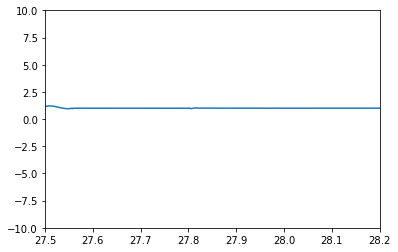

In [26]:
# get metta data for attitude adjustment

fname=metdir+'CAMP2EX-MetNav_P3B_'+yyyymmdd+'_R0.ict'
fo=open(fname,'r') #create file object
data=fo.readlines()[75:]
fo.close()
splitcol=data[0].split(',')
Ncol=len(splitcol)-splitcol.count(',')
Nrow=len(data)
dataT=np.zeros((Nrow,Ncol),'f')
for i in range(Nrow):
    splitcol=data[i].split(',')
    k=0
    for j in range(len(splitcol)):
        if splitcol[j] != ' ' and splitcol[j] != '\n' : 
            dataT[i,k]=float(splitcol[j])
            k=k+1

metnav_time=dataT[:,0]/3600.0
metnav_lat =dataT[:,2]
metnav_lon =dataT[:,3]
heading=dataT[:,12]
track_angle=dataT[:,13]
drift_angle=dataT[:,14]
pitch_angle=dataT[:,15]
roll_angle =dataT[:,16]
solar_zenith=dataT[:,26]
solar_azimuth=dataT[:,28]

a1=np.cos((90-solar_zenith)*math.pi/180.0)*np.sin(roll_angle*math.pi/180.0)*np.sin((solar_azimuth-heading)*math.pi/180.0)
a2=np.cos((90-solar_zenith)*math.pi/180.0)*np.sin(pitch_angle*math.pi/180.0)*np.cos((solar_azimuth-heading)*math.pi/180.0)
a3=np.sin((90-solar_zenith)*math.pi/180.0)*np.cos(pitch_angle*math.pi/180.0)*np.cos(roll_angle*math.pi/180.0)
correct_factor=np.sin((90-solar_zenith)*math.pi/180.0)/(a1-a2+a3)
ind=np.where(correct_factor < 0)
ind=ind[0]
correct_factor[ind]=1.0
ind=np.where(correct_factor > 10)
ind=ind[0]
correct_factor[ind]=1.0
correct_factor_new=np.interp(BBR_time,metnav_time,correct_factor)
plt.plot(metnav_time,correct_factor)
plt.ylim([-10,10])
plt.xlim(timerange)
print(dataT.shape,ind.shape)

(252, 6)
252 (2519,) 27.639166 1116.268 189.75


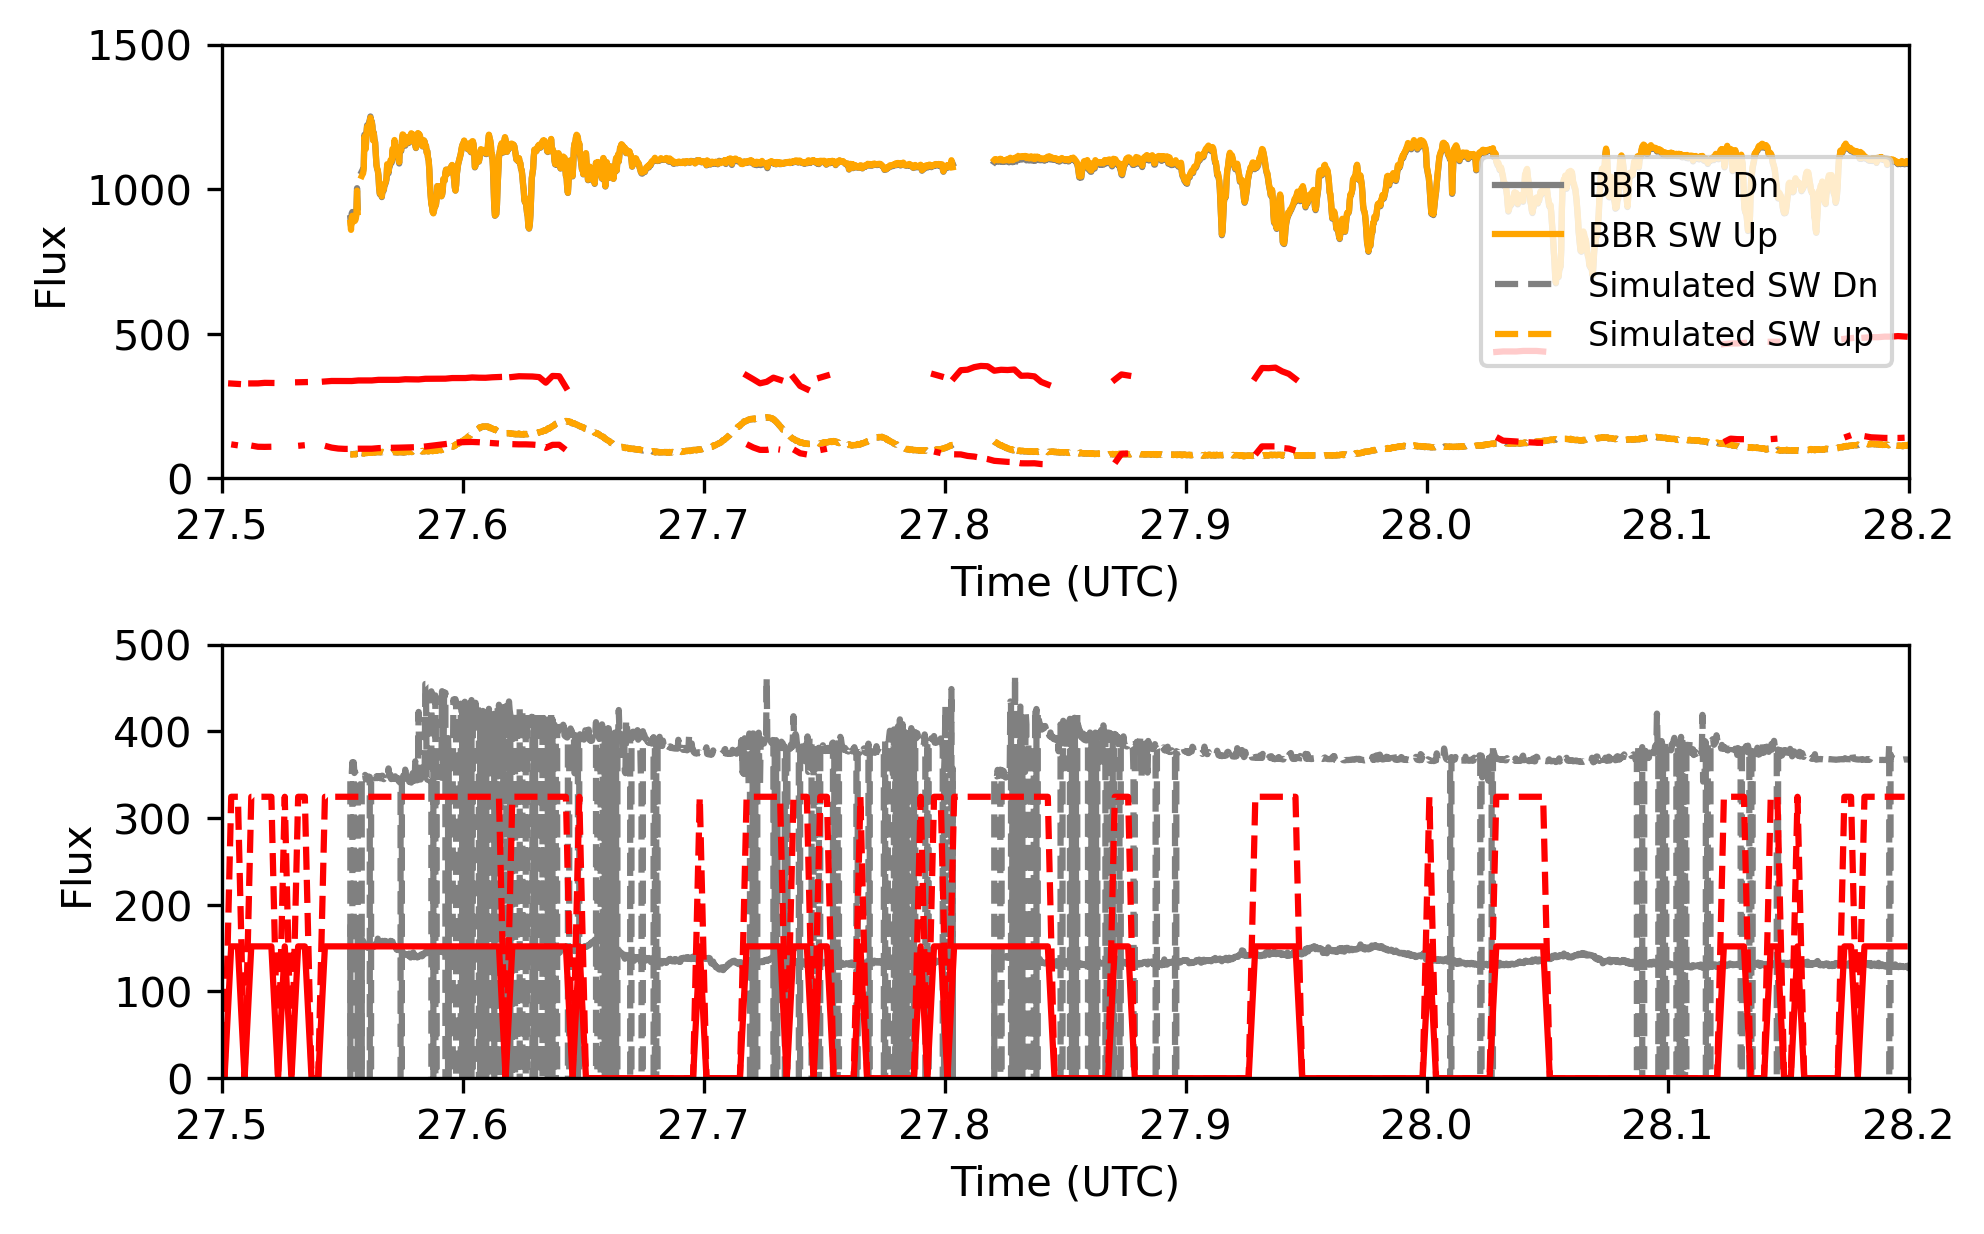

In [27]:

#check output at flight level

fname='swlw_outflight_level_2019091523_re25.txt'
Ns=len(hsrl_time1)
fo=open(fname,'r') #create file object
data=fo.readlines()
fo.close()
splitcol=data[0].split(' ')
Ncol=len(splitcol)-splitcol.count(' ')
Nrow=len(data)
dataT=np.zeros((Nrow,Ncol),'f')
for i in range(Nrow):
    splitcol=data[i].split(' ')
    k=0
    for j in range(len(splitcol)):
        if splitcol[j] != ' ' and splitcol[j] != '\n' : 
            dataT[i,k]=float(splitcol[j])
            k=k+1

print(dataT.shape)
swdn_output=dataT[:,2]
swup_output=dataT[:,3]
lwdn_output=dataT[:,4]
lwup_output=dataT[:,5]

swdn_output[swdn_output==0]='nan'
swup_output[swup_output==0]='nan'
BBR_dnsw[BBR_dnsw < 0]='nan'
BBR_upsw[BBR_upsw < 0]='nan'

ind=np.where((BBR_time > timerange[0]) & (BBR_time < timerange[1]))
ind=ind[0]
print(Ns,ind.shape,BBR_time[ind[500]],BBR_dnsw[ind[500]],BBR_upsw[ind[500]])

fig, ax =plt.subplots(2,figsize=[6.5,4],dpi=300,constrained_layout=True)
p03=ax[0].plot(BBR_time,BBR_dnsw,color='grey')
p030=ax[0].plot(BBR_time,BBR_dnsw*correct_factor_new,color='orange')
p13=ax[0].plot(BBR_time,BBR_upsw,color='grey',linestyle='dashed')
p130=ax[0].plot(BBR_time,BBR_upsw*correct_factor_new,color='orange',linestyle='dashed')
p23=ax[0].plot(hsrl_time1,swdn_output/1000.0,color='red')
p33=ax[0].plot(hsrl_time1,swup_output/1000.0,color='red',linestyle='dashed')
ax[0].set_xlim(timerange)
ax[0].set_ylim((0,1500))
ax[0].set_xlabel('Time (UTC)')
ax[0].set_ylabel('Flux')

ax[0].legend(['BBR SW Dn','BBR SW Up','Simulated SW Dn','Simulated SW up'],loc=7,fontsize=8)

p03=ax[1].plot(BBR_time,BBR_dnlw,color='grey')
p13=ax[1].plot(BBR_time,BBR_uplw,color='grey',linestyle='dashed')
p23=ax[1].plot(hsrl_time1,lwdn_output,color='red')
p33=ax[1].plot(hsrl_time1,lwup_output,color='red',linestyle='dashed')
ax[1].set_xlim(timerange)
ax[1].set_ylim((0,500))
ax[1].set_xlabel('Time (UTC)')
ax[1].set_ylabel('Flux')

#print(hsrl_time1[1,90])
#ax1.set_color('red')
plt.show()